In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df1=pd.read_csv('vinfast_stations_by_id.csv')
df2=pd.read_csv('vinfast_station.csv')
df3=pd.read_csv('vinfast_connector_count.csv')

# Kiểm tra và xử lý dữ liệu thực tế từ việc cào website Vinfast

In [2]:
vinfast_new= pd.merge(df1,df3,on="id",how="outer")

In [3]:
vinfast_new.head(10)

,id,depot_name,category,depot_status,address,latitude,longitude,district_id,province_id,connector_count
0,15160,Vinhomes Skylake,bike_charging_station,Available,"Vinhomes Skylake, ô đất E1.3, khu đô thị mới C...",21.019840,105.780830,1693.0,1680.0,32.0
1,15161,Vincom Plaza Imperia,bike_charging_station,Maintaining,"Hầm B1, cột G8, Vincom Imperia Hải Phòng",20.862921,106.661491,1909.0,1908.0,24.0
2,15162,Vinhomes Gardenia,bike_charging_station,Available,"Tòa A1, Vinhomes Gardenia, số 16, đường Hàm Nghi",21.035620,105.761292,1693.0,1680.0,54.0
3,15163,"Vinhomes Ocean Park, hầm PK4, CT02 PK3",bike_charging_station,Available,"Hầm tòa S1.01 , S1.03, Vinhomes Ocean Park",20.991619,105.939507,1692.0,1680.0,64.0
4,15164,Vincom Plaza Đồng Hới,bike_charging_station,Available,Đường Quách Xuân Kỳ,17.465219,106.626259,NaN,2034.0,24.0
5,15165,"Vinpearl Hòn Tre, bãi xe CBNV",bike_charging_station,Maintaining,Bãi xe Cán bộ nhân viên Vinpearl Hòn Tre,12.198982,109.214333,2129.0,2128.0,24.0
6,15166,"Siêu thị Big C, Go! Buôn Ma Thuột",bike_charging_station,Maintaining,"Góc đường Nguyễn Thị Định, vành đai phía Tây",12.683917,108.018478,2187.0,2186.0,NaN
7,15167,"Vinhomes Ocean Park, hầm S1.05, S1.07, CT01 PK3",bike_charging_station,Available,"Hầm S1.05, S1.07, Tòa CT01, PK3,Vinhomes Ocean...",21.001160,105.943207,1692.0,1680.0,60.0
8,15168,"Vinhomes Ocean Park, tòa CT04-PK3",bike_charging_station,Available,"Hầm tòa chung cư S1.8, S1.9 Vinhomes Ocean Park",20.995470,105.940483,1692.0,1680.0,86.0
9,15169,Vincom Plaza Bảo Lộc,bike_charging_station,Available,"Số 83, đường Lê Hồng Phong",11.543899,107.810974,2213.0,2211.0,24.0


In [4]:
vinfast_new.shape

(14298, 10)

In [5]:
vinfast_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14298 entries, 0 to 14297
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14298 non-null  int64  
 1   depot_name       14297 non-null  object 
 2   category         14297 non-null  object 
 3   depot_status     14297 non-null  object 
 4   address          14297 non-null  object 
 5   latitude         14297 non-null  float64
 6   longitude        14297 non-null  float64
 7   district_id      14279 non-null  float64
 8   province_id      14297 non-null  float64
 9   connector_count  8133 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.1+ MB


## Connector_count is null -> charge station dont have charging connector

In [6]:
vfcheck=vinfast_new.fillna(0)

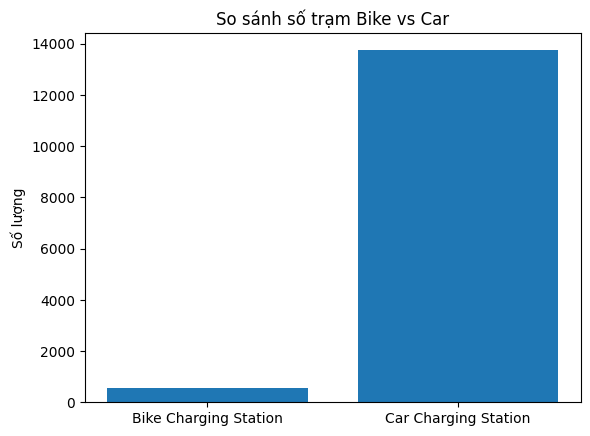

In [7]:
bike_charge=vfcheck.loc[(vfcheck['category']=='bike_charging_station')].shape[0]
car_chart=vfcheck.loc[(vfcheck['category']=='car_charging_station')].shape[0]

plt.bar(['Bike Charging Station', 'Car Charging Station'], [bike_charge, car_chart])
plt.ylabel("Số lượng")
plt.title("So sánh số trạm Bike vs Car")
plt.show()

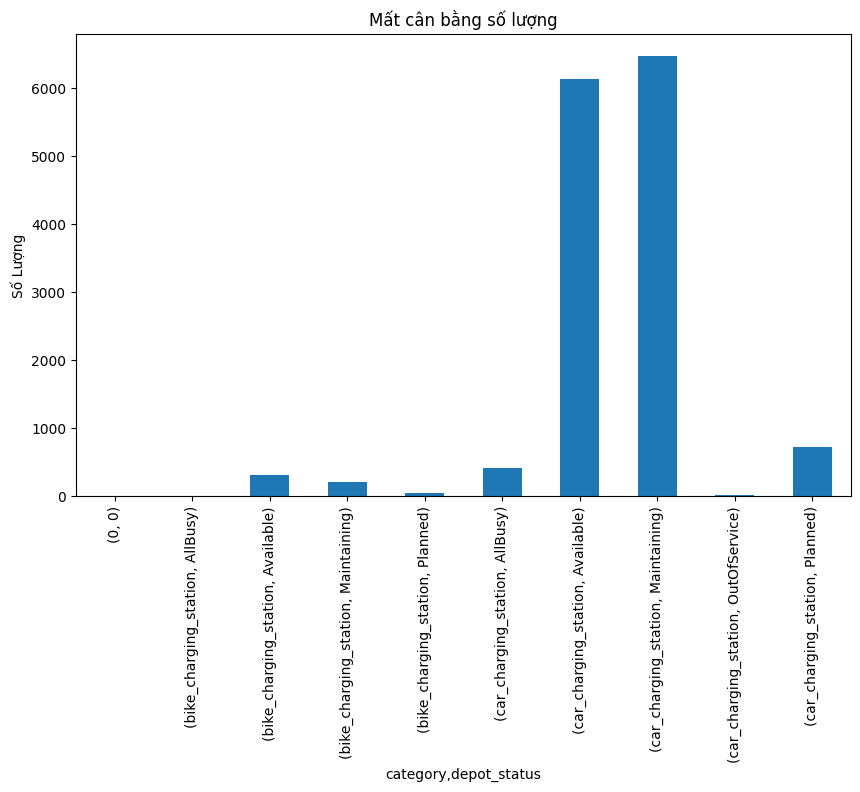

In [8]:
charge_compair=vfcheck.groupby(["category","depot_status"]).size()
charge_compair.plot(kind="bar",figsize=(10,6))
plt.ylabel("Số Lượng")
plt.title("Mất cân bằng số lượng")
plt.show()

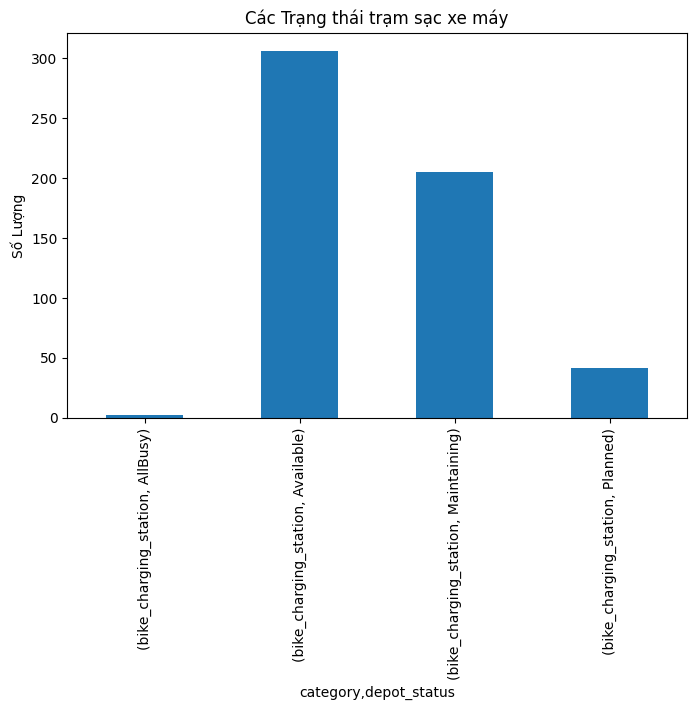

In [9]:
charge_bike_compair=vfcheck.loc[(vfcheck['category']=='bike_charging_station')].groupby(["category","depot_status"]).size()
charge_bike_compair.plot(kind="bar",figsize=(8,5))
plt.ylabel("Số Lượng")
plt.title("Các Trạng thái trạm sạc xe máy")
plt.show()

In [10]:
charge_status_count=(vfcheck.groupby(["category","depot_status"]).agg(
    station_count=("id","count"),
    total_connectors=("connector_count","sum")).reset_index())

In [11]:
print(charge_status_count)

                category  depot_status  station_count  total_connectors
0                      0             0              1               1.0
1  bike_charging_station       AllBusy              2              22.0
2  bike_charging_station     Available            306           22064.0
3  bike_charging_station   Maintaining            205            2584.0
4  bike_charging_station       Planned             42             912.0
5   car_charging_station       AllBusy            405             752.0
6   car_charging_station     Available           6131           30347.0
7   car_charging_station   Maintaining           6471            1963.0
8   car_charging_station  OutOfService             13              26.0
9   car_charging_station       Planned            722             171.0


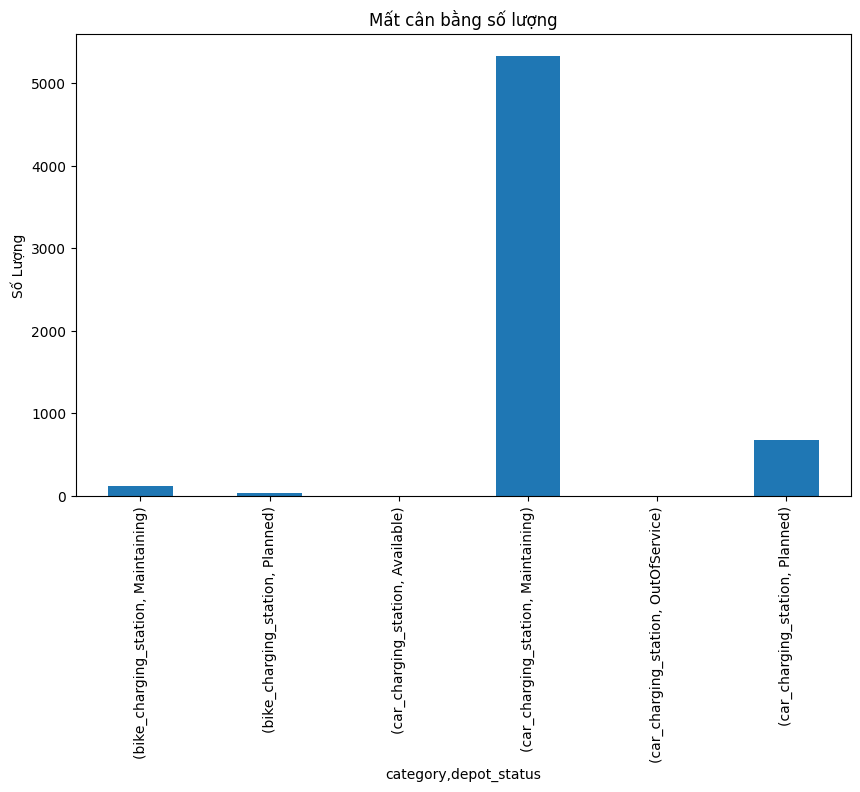

In [12]:
charge_compair_connector_like_0=vfcheck.loc[(vfcheck["connector_count"]==0)].groupby(["category","depot_status"]).size()
charge_compair_connector_like_0.plot(kind="bar",figsize=(10,6))
plt.ylabel("Số Lượng")
plt.title("Mất cân bằng số lượng")
plt.show()

In [13]:
charge_bike_compair_not_null=vfcheck.loc[(vfcheck["category"]=='bike_charging_station')& (vfcheck["connector_count"]>0)]

In [14]:
charge_bike_compair_not_null.describe()

,id,latitude,longitude,district_id,province_id,connector_count
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,15433.179747,16.446885,106.364676,2001.430380,2008.088608,64.764557
std,719.334330,4.805226,1.056289,306.293831,252.905301,163.338497
min,15160.000000,9.165508,103.848740,0.000000,1680.000000,4.000000
25%,15269.500000,10.846699,105.777382,1708.000000,1680.000000,12.000000
50%,15374.000000,18.705521,105.977257,2012.000000,1999.000000,24.000000
75%,15536.500000,21.000265,106.765099,2285.000000,2277.000000,68.000000
max,29376.000000,22.833702,109.308830,2433.000000,2432.000000,2556.000000


In [15]:
charge_bike_compair_not_null.head()

,id,depot_name,category,depot_status,address,latitude,longitude,district_id,province_id,connector_count
0,15160,Vinhomes Skylake,bike_charging_station,Available,"Vinhomes Skylake, ô đất E1.3, khu đô thị mới C...",21.019840,105.780830,1693.0,1680.0,32.0
1,15161,Vincom Plaza Imperia,bike_charging_station,Maintaining,"Hầm B1, cột G8, Vincom Imperia Hải Phòng",20.862921,106.661491,1909.0,1908.0,24.0
2,15162,Vinhomes Gardenia,bike_charging_station,Available,"Tòa A1, Vinhomes Gardenia, số 16, đường Hàm Nghi",21.035620,105.761292,1693.0,1680.0,54.0
3,15163,"Vinhomes Ocean Park, hầm PK4, CT02 PK3",bike_charging_station,Available,"Hầm tòa S1.01 , S1.03, Vinhomes Ocean Park",20.991619,105.939507,1692.0,1680.0,64.0
4,15164,Vincom Plaza Đồng Hới,bike_charging_station,Available,Đường Quách Xuân Kỳ,17.465219,106.626259,0.0,2034.0,24.0


In [16]:
log_analyst=charge_bike_compair_not_null.drop(columns=["depot_name","category","address","depot_status"])

In [17]:
log_analyst.head(10)


,id,latitude,longitude,district_id,province_id,connector_count
0,15160,21.019840,105.780830,1693.0,1680.0,32.0
1,15161,20.862921,106.661491,1909.0,1908.0,24.0
2,15162,21.035620,105.761292,1693.0,1680.0,54.0
3,15163,20.991619,105.939507,1692.0,1680.0,64.0
4,15164,17.465219,106.626259,0.0,2034.0,24.0
5,15165,12.198982,109.214333,2129.0,2128.0,24.0
7,15167,21.001160,105.943207,1692.0,1680.0,60.0
8,15168,20.995470,105.940483,1692.0,1680.0,86.0
9,15169,11.543899,107.810974,2213.0,2211.0,24.0
10,15170,12.242969,109.193367,2129.0,2128.0,20.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features
X = log_analyst[["province_id", "district_id", "latitude", "longitude"]]
y = log_analyst["connector_count"]

# Cột phân loại (categorical) và cột số (numeric)
categorical = ["province_id", "district_id"]
numeric = ["latitude", "longitude"]

# Tiền xử lý: OneHot cho cat, giữ nguyên num
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Mô hình (RandomForest có thể đổi sang XGB/LightGBM)
model = RandomForestRegressor(n_estimators=300, random_state=42)

# Pipeline
clf = Pipeline(steps=[("preprocessor", preprocessor),
                     ("model", model)])

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện
haclf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("MAE validation:", mean_absolute_error(y_val, y_pred))


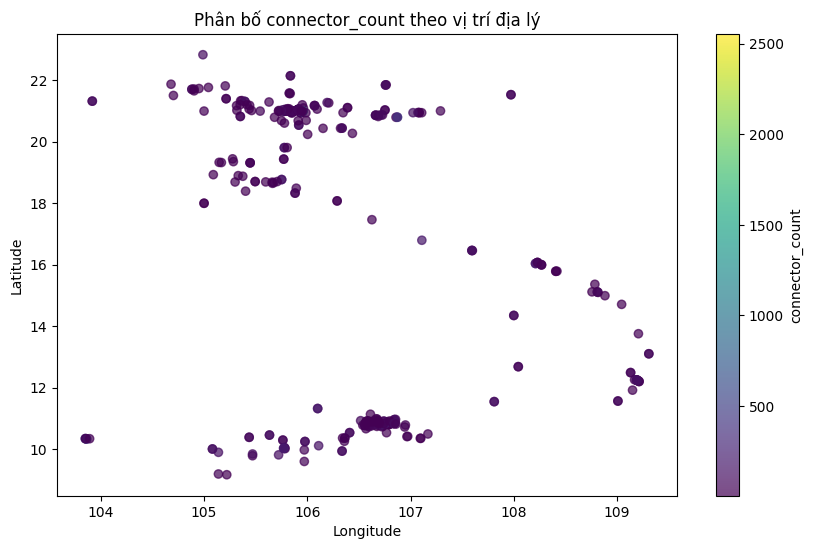

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sc = plt.scatter(
    log_analyst["longitude"], 
    log_analyst["latitude"], 
    c=log_analyst["connector_count"], 
    cmap="viridis", 
    alpha=0.7
)
plt.colorbar(sc, label="connector_count")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Phân bố connector_count theo vị trí địa lý")
plt.show()


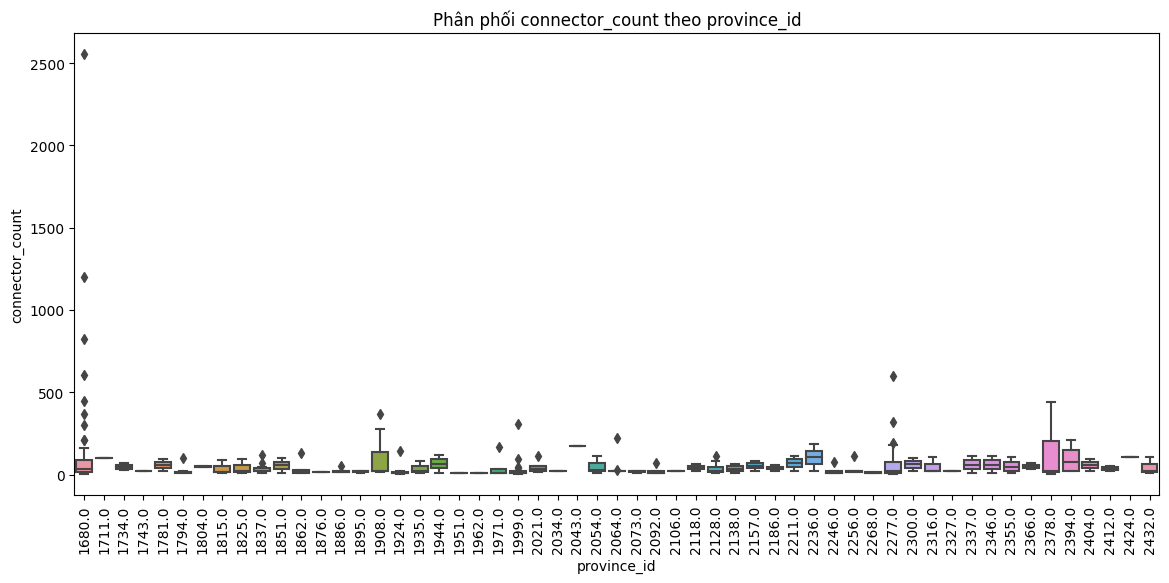

In [20]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(
    data=log_analyst, 
    x="province_id", 
    y="connector_count"
)
plt.xticks(rotation=90)
plt.title("Phân phối connector_count theo province_id")
plt.show()


In [21]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ===================== 1) HÀM TIỆN ÍCH =====================
def target_encode_smooth(train_key: pd.Series,
                         train_y: pd.Series,
                         apply_key: pd.Series,
                         m: float = 50,
                         global_mean: float | None = None):
    """
    Smoothed target encoding:
    TE(cat) = (n*mean_cat + m*global_mean) / (n + m)
    - train_key: Series ID (province_id hoặc district_id) của TẬP TRAIN
    - train_y  : Series mục tiêu (connector_count) của TẬP TRAIN
    - apply_key: Series ID cần map (train/val/test)
    """
    if global_mean is None:
        global_mean = train_y.mean()
    stats = train_y.groupby(train_key).agg(["mean", "count"])
    stats["te"] = (stats["mean"] * stats["count"] + m * global_mean) / (stats["count"] + m)
    mapping = stats["te"]
    return apply_key.map(mapping).fillna(global_mean), mapping

# ===================== 2) CHUẨN BỊ DỮ LIỆU =====================
df = log_analyst.copy()

# Các cột bắt buộc phải có:
required_cols = {"province_id", "district_id", "latitude", "longitude", "connector_count"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Thiếu cột: {missing}")

# Lọc các hàng hợp lệ
df = df.dropna(subset=["province_id","district_id","latitude","longitude","connector_count"])

# Chọn features/target
X = df[["province_id","district_id","latitude","longitude"]].copy()
y = df["connector_count"].astype(int).copy()

# ===================== 3) CHỌN NHÓM LỚP (TOP-K GIÁ TRỊ LẶP) =====================
top_k = 10  # bạn có thể đổi 8/12 tùy phân phối
top_vals = [v for v, _ in Counter(y).most_common(top_k)]

df_cls = df[df["connector_count"].isin(top_vals)].copy()
Xc = df_cls[["province_id","district_id","latitude","longitude"]].copy()
yc = df_cls["connector_count"].astype(int)

# Split train/val
Xc_train, Xc_val, yc_train, yc_val = train_test_split(
    Xc, yc, test_size=0.2, random_state=42, stratify=yc
)

# ===================== 4) TARGET ENCODING + FEATURE MATRIX =====================
# TE CHỈ tính trên TRAIN rồi map sang VAL (tránh rò rỉ)
te_prov_tr, map_prov = target_encode_smooth(Xc_train["province_id"], yc_train, Xc_train["province_id"], m=50)
te_dist_tr, map_dist = target_encode_smooth(Xc_train["district_id"], yc_train, Xc_train["district_id"], m=50)
te_prov_va = Xc_val["province_id"].map(map_prov).fillna(yc_train.mean())
te_dist_va = Xc_val["district_id"].map(map_dist).fillna(yc_train.mean())

Xtr_cls = pd.DataFrame({
    "te_prov": te_prov_tr,
    "te_dist": te_dist_tr,
    "latitude": Xc_train["latitude"].values,
    "longitude": Xc_train["longitude"].values
})
Xva_cls = pd.DataFrame({
    "te_prov": te_prov_va,
    "te_dist": te_dist_va,
    "latitude": Xc_val["latitude"].values,
    "longitude": Xc_val["longitude"].values
})

# ===================== 5) TRAIN CLASSIFIER & ĐÁNH GIÁ =====================
clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
clf.fit(Xtr_cls, yc_train)
pred_cls = clf.predict(Xva_cls)

# Đánh giá: MAE (vì ta cần so với số đếm) + Accuracy để tham khảo
mae_cls = mean_absolute_error(yc_val, pred_cls)
acc_cls = accuracy_score(yc_val, pred_cls)

print(f"MAE classifier→count: {mae_cls:.3f}")
print(f"Accuracy (top-{top_k} classes): {acc_cls:.3f}")


MAE classifier→count: 9.447
Accuracy (top-10 classes): 0.234


In [22]:
charge_connector_like_0=vfcheck.loc[(vfcheck["connector_count"]==0) & (vfcheck["category"]=="bike_charging_station")]

In [23]:
try:
    charge_connector_like_0
    Xb = charge_connector_like_0[["province_id","district_id","latitude","longitude"]].copy()

    # map TE theo mapping train; unseen -> dùng mean(yc_train)
    te_prov_b = Xb["province_id"].map(map_prov).fillna(yc_train.mean())
    te_dist_b = Xb["district_id"].map(map_dist).fillna(yc_train.mean())

    Xb_cls = pd.DataFrame({
        "te_prov": te_prov_b,
        "te_dist": te_dist_b,
        "latitude": Xb["latitude"].values,
        "longitude": Xb["longitude"].values
    })

    pred_b = clf.predict(Xb_cls)

    # (khuyến nghị) backoff nếu muốn xử lý điểm ngoài lớp top-k:
    # dùng mean theo district_id/province_id của TẬP TRAIN
    dist_mean = yc_train.groupby(Xc_train["district_id"]).mean()
    prov_mean = yc_train.groupby(Xc_train["province_id"]).mean()
    global_mean = yc_train.mean()

    # nếu muốn trộn 2 cách: class-pred (ưu tiên) + backoff cho nhãn hiếm (tuỳ chiến lược)
    # ở đây, vì classifier chỉ trả về top-k lớp, ta gán trực tiếp:
    predict_reuslt = charge_connector_like_0.loc[charge_connector_like_0["connector_count"] == 0].copy()
    charge_connector_like_0.loc[predict_reuslt.index, "connector_count_predicted"] = pred_b.astype(int)


except NameError:
    # không có df_b thì bỏ qua phần dự đoán
    pass

C:\Users\User\AppData\Local\Temp\ipykernel_8572\2470671479.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charge_connector_like_0.loc[predict_reuslt.index, "connector_count_predicted"] = pred_b.astype(int)


In [24]:
charge_connector_like_0=charge_connector_like_0.drop(columns='connector_count')
charge_connector_like_0=charge_connector_like_0.rename(columns={'connector_count_predicted':'connector_count'})

In [25]:
check=pd.concat([charge_bike_compair_not_null,charge_connector_like_0], axis=0 ,ignore_index=True)
check.tail(10)

,id,depot_name,category,depot_status,address,latitude,longitude,district_id,province_id,connector_count
545,15704,Cửa hàng xăng dầu Petrolimex Hành Thuận,bike_charging_station,Maintaining,"Cửa hàng xăng dầu Petrolimex Hành Thuận, thôn ...",15.086087,108.780853,2101.0,2092.0,24.0
546,15705,Bãi đỗ xe tư nhân Trà Xuân,bike_charging_station,Maintaining,"Đường Lê Trung Đình, Xã Trà Xuân",15.254472,108.519722,2095.0,2092.0,24.0
547,29374,BĐX Tư Nhân Anh Sinh,bike_charging_station,Maintaining,Xã Nghĩa Kỳ,15.124034,108.745644,2097.0,2092.0,12.0
548,29375,Bãi đỗ xe Cảng Sa Kỳ,bike_charging_station,Maintaining,"Cảng Sa Kỳ, xã Bình Châu",15.215370,108.914238,2094.0,2092.0,24.0
549,29377,Cửa hàng xăng dầu PVOIL NQTM Bắc Châu Ổ,bike_charging_station,Maintaining,"Đội 16, thôn Châu Tử, xã Bình Nguyên",15.314278,108.750648,2094.0,2092.0,24.0
550,29379,Cửa hàng xăng dầu Trường Sa,bike_charging_station,Maintaining,"Số 10, Đường Trường Sa, bờ Nam sông Trà Khúc,...",15.127738,108.834831,2093.0,2092.0,24.0
551,29380,Bãi đỗ xe Khu dân cư An Phú Sinh,bike_charging_station,Maintaining,"Nghĩa Chánh, Phường Nghĩa Chánh Nam",15.115593,108.820229,2093.0,2092.0,24.0
552,29381,Cửa hàng xăng dầu PVOIL NQTM Thiên Long,bike_charging_station,Maintaining,"Số 80, đường Đặng Thùy Trâm, Tổ dân phố 2, Thị...",15.091011,108.818207,2097.0,2092.0,12.0
553,29457,Cửa hàng xăng dầu Hợp Hải,bike_charging_station,Maintaining,"Cửa hàng xăng dầu Hợp Hải, cầu Phong Châu, TX ...",21.286551,105.262390,1864.0,1862.0,16.0
554,29458,Bãi đỗ xe Công ty Supe Lâm Thao,bike_charging_station,Maintaining,"Khu Tiến Mới, Thị trấn Lâm Thao",21.329584,105.285324,1872.0,1862.0,16.0


In [31]:
charge_bike_compair_not_null["connector_count"].sum()

25582.0

In [34]:
charge_connector_like_0.describe()

,id,latitude,longitude,district_id,province_id,connector_count
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.00000
mean,16216.22500,17.188620,106.411156,1980.475000,1984.875000,18.51250
std,3036.51208,4.317571,1.235282,272.904087,222.572093,11.49295
min,15166.00000,9.924048,103.026131,0.000000,1680.000000,4.00000
25%,15445.00000,12.169301,105.733866,1732.500000,1731.250000,12.00000
50%,15534.50000,18.823936,105.952416,2013.000000,1999.000000,16.00000
75%,15654.25000,20.998632,106.811789,2145.000000,2142.500000,24.00000
max,29458.00000,22.935810,109.213959,2390.000000,2378.000000,64.00000


In [32]:
check["connector_count"].sum()

28544.0

### -) Dữ liệu thiếu tính chính xác, tối ưu hóa dữ liệu nhưng độ lệnh chuẩn vẫn cao, dữ liệu sau khi được dự đoán thiếu tính chính xác chỉ là tham khảo do thiếu các yếu tố quyết định như điện tích hay dân cư khu vực

### -> Sử dụng dữ với giá trị trung bình khuyết thiếu cũng có thể dùng dể nhận diện tính khả thi dữ liệu

# Cleaning Car_charging_station analyst

In [36]:
df2.head(10)

,name,description,longitude,latitude,Latitude,Longitude,Địa Chỉ,Cổng sạc,Thời gian hoạt động,Gửi xe,Trạm sạc,Cập nhật lần cuối
0,Vincom Plaza Hà Tĩnh,Latitude: 18.3367<br>Longitude: 105.895203<br>...,105.895203,18.336700,18.336700,105.895203,"Vincom Plaza Hà Tĩnh, ngã tư đường Hàm Nghi gi...",5 cổng 250KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
1,Vinhomes Marina,Latitude: 20.820971<br>Longitude: 106.689148<b...,106.689148,20.820971,20.820971,106.689148,"Vinhomes Marina, Đường Cầu Rào 2, phường Vĩnh ...",1 cổng 250KW\n8 cổng 60KW\n1 cổng 11KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
2,Vinpearl Waterpark Hà Tĩnh,Latitude: 18.48855<br>Longitude: 105.891556<br...,105.891556,18.488550,18.488550,105.891556,"Bãi đỗ xe ngoài trời Wertepak Hà Tĩnh, xóm hòa...",1 cổng 250KW\n2 cổng 30KW\n6 cổng 20KW\n6 cổng...,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
3,Vinpearl Discovery Cửa Hội,Latitude: 18.770851<br>Longitude: 105.75724<br...,105.757240,18.770851,18.770851,105.757240,Bãi đỗ xe ngoài trời Vinpearl Discovery Cửa Hộ...,1 cổng 250KW\n2 cổng 30KW\n5 cổng 11KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
4,Vincom+ Nam Đàn,Latitude: 18.706059<br>Longitude: 105.494881<b...,105.494881,18.706059,18.706059,105.494881,"Bãi đỗ xe Vincom+ Nam Đàn, khối Nam Bắc Sơn, H...",1 cổng 250KW\n4 cổng 60KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
5,"Vincom+ Thái Hòa, bãi đỗ xe ngoài trời",Latitude: 19.316675<br>Longitude: 105.446007<b...,105.446007,19.316675,19.316675,105.446007,"Bãi đỗ xe ngoài trời Vincom+ Thái Hòa, khối 8,...",5 cổng 250KW\n2 cổng 60KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
6,Vincom+ Uông Bí,Latitude: 21.033751<br>Longitude: 106.752342<b...,106.752342,21.033751,21.033751,106.752342,"Vincom+ Uông Bí, khu đô thị Yên Thanh, phường ...",1 cổng 250KW\n2 cổng 60KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
7,Vinwonders Nam Hội An,Latitude: 15.785498<br>Longitude: 108.408577<b...,108.408577,15.785498,15.785498,108.408577,"Đường Võ Chí Công, Huyện Thăng Bình, Tỉnh Quản...",1 cổng 250KW\n2 cổng 30KW\n2 cổng 11KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
8,Vincom Plaza Ngô Quyền,Latitude: 16.071417<br>Longitude: 108.230171<b...,108.230171,16.071417,16.071417,108.230171,"Số 910A, Đường Ngô Quyền, phường An Hải Bắc, Q...",1 cổng 250KW\n2 cổng 180KW\n6 cổng 60KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17
9,Marriott Resort & Spa Đà Nẵng,Latitude: 16.005541<br>Longitude: 108.266151<b...,108.266151,16.005541,16.005541,108.266151,"Số 7, Đường Trường Sa, phường Hòa Hải, Quận Ng...",1 cổng 250KW\n10 cổng 60KW,24/7,Có thể mất phí,Công cộng,12/07/2025 22:17


In [41]:
import re
df2=pd.read_csv('vinfast_station.csv')

def parse_power_counts(cell: str):
    """
    Parse dạng duy nhất: '<count> cổng <power>KW'
    Ví dụ: '1 cổng 250KW\\n8 cổng 60KW\\n1 cổng 11KW'
    -> {'250kW': 1, '60kW': 8, '11kW': 1}
    """
    s = str(cell)
    s = s.replace("<br>", "\n")
    out = {}
    matches = re.findall(r'(\d+)\s*cổng\s*(\d+(?:[.,]\d+)?)\s*kW', s, flags=re.I)
    for cnt_str, kw_str in matches:
        cnt = int(cnt_str)
        kw = float(kw_str.replace(',', '.'))
        label = f"{int(kw) if abs(kw-round(kw))<1e-9 else kw:g}kW"
        out[label] = out.get(label, 0) + cnt
    return out

maps = df2['Cổng sạc'].fillna('').apply(parse_power_counts)

power_df = pd.DataFrame(maps.tolist()).fillna(0).astype(int)

power_df = power_df.reindex(
    sorted(power_df.columns, key=lambda c: float(c.lower().replace('kw',''))),
    axis=1
)

df2 = pd.concat([df2, power_df], axis=1)

df2['Tổng cổng'] = power_df.sum(axis=1).astype(int)


In [42]:
df2.head()

,name,description,longitude,latitude,Latitude,Longitude,Địa Chỉ,Cổng sạc,Thời gian hoạt động,Gửi xe,...,30kW,60kW,80kW,120kW,150kW,180kW,250kW,300kW,360kW,Tổng cổng
0,Vincom Plaza Hà Tĩnh,Latitude: 18.3367<br>Longitude: 105.895203<br>...,105.895203,18.336700,18.336700,105.895203,"Vincom Plaza Hà Tĩnh, ngã tư đường Hàm Nghi gi...",5 cổng 250KW,24/7,Có thể mất phí,...,0,0,0,0,0,0,5,0,0,5
1,Vinhomes Marina,Latitude: 20.820971<br>Longitude: 106.689148<b...,106.689148,20.820971,20.820971,106.689148,"Vinhomes Marina, Đường Cầu Rào 2, phường Vĩnh ...",1 cổng 250KW\n8 cổng 60KW\n1 cổng 11KW,24/7,Có thể mất phí,...,0,8,0,0,0,0,1,0,0,10
2,Vinpearl Waterpark Hà Tĩnh,Latitude: 18.48855<br>Longitude: 105.891556<br...,105.891556,18.488550,18.488550,105.891556,"Bãi đỗ xe ngoài trời Wertepak Hà Tĩnh, xóm hòa...",1 cổng 250KW\n2 cổng 30KW\n6 cổng 20KW\n6 cổng...,24/7,Có thể mất phí,...,2,0,0,0,0,0,1,0,0,15
3,Vinpearl Discovery Cửa Hội,Latitude: 18.770851<br>Longitude: 105.75724<br...,105.757240,18.770851,18.770851,105.757240,Bãi đỗ xe ngoài trời Vinpearl Discovery Cửa Hộ...,1 cổng 250KW\n2 cổng 30KW\n5 cổng 11KW,24/7,Có thể mất phí,...,2,0,0,0,0,0,1,0,0,8
4,Vincom+ Nam Đàn,Latitude: 18.706059<br>Longitude: 105.494881<b...,105.494881,18.706059,18.706059,105.494881,"Bãi đỗ xe Vincom+ Nam Đàn, khối Nam Bắc Sơn, H...",1 cổng 250KW\n4 cổng 60KW,24/7,Có thể mất phí,...,0,4,0,0,0,0,1,0,0,5


In [43]:
Available_data=df2.drop(columns=["description","longitude","latitude","Longitude","Latitude","Cổng sạc","Thời gian hoạt động","Gửi xe","Cập nhật lần cuối"])

In [44]:
Available_data.head()

,name,Địa Chỉ,Trạm sạc,3kW,7kW,11kW,20kW,22kW,30kW,60kW,80kW,120kW,150kW,180kW,250kW,300kW,360kW,Tổng cổng
0,Vincom Plaza Hà Tĩnh,"Vincom Plaza Hà Tĩnh, ngã tư đường Hàm Nghi gi...",Công cộng,0,0,0,0,0,0,0,0,0,0,0,5,0,0,5
1,Vinhomes Marina,"Vinhomes Marina, Đường Cầu Rào 2, phường Vĩnh ...",Công cộng,0,0,1,0,0,0,8,0,0,0,0,1,0,0,10
2,Vinpearl Waterpark Hà Tĩnh,"Bãi đỗ xe ngoài trời Wertepak Hà Tĩnh, xóm hòa...",Công cộng,6,0,0,6,0,2,0,0,0,0,0,1,0,0,15
3,Vinpearl Discovery Cửa Hội,Bãi đỗ xe ngoài trời Vinpearl Discovery Cửa Hộ...,Công cộng,0,0,5,0,0,2,0,0,0,0,0,1,0,0,8
4,Vincom+ Nam Đàn,"Bãi đỗ xe Vincom+ Nam Đàn, khối Nam Bắc Sơn, H...",Công cộng,0,0,0,0,0,0,4,0,0,0,0,1,0,0,5


In [46]:
Available_data["Tổng cổng"].sum()

29593

In [47]:
charge_status_count=(vfcheck.groupby(["category","depot_status"]).agg(
    station_count=("id","count"),
    total_connectors=("connector_count","sum")).reset_index())

In [48]:
charge_status_count

,category,depot_status,station_count,total_connectors
0,0,0,1,1.0
1,bike_charging_station,AllBusy,2,22.0
2,bike_charging_station,Available,306,22064.0
3,bike_charging_station,Maintaining,205,2584.0
4,bike_charging_station,Planned,42,912.0
5,car_charging_station,AllBusy,405,752.0
6,car_charging_station,Available,6131,30347.0
7,car_charging_station,Maintaining,6471,1963.0
8,car_charging_station,OutOfService,13,26.0
9,car_charging_station,Planned,722,171.0


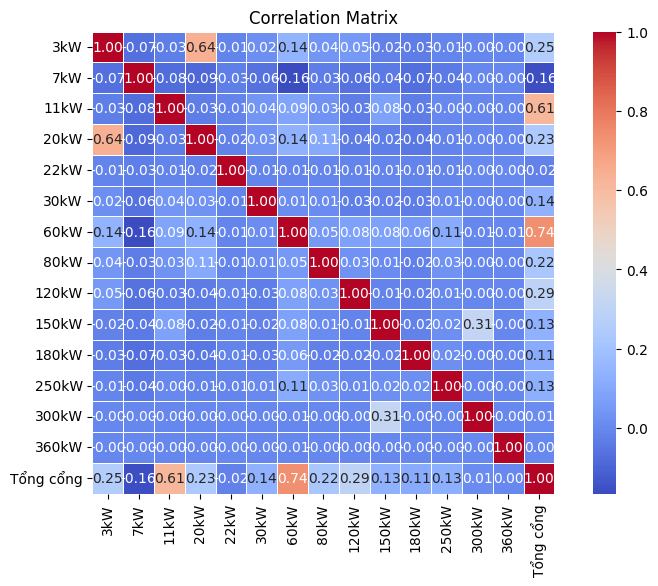

In [55]:
corr_data=Available_data.drop(columns=["name","Địa Chỉ","Trạm sạc"])
corr_matrix=corr_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### thiếu khả thi do dữ liệu tính liên kết quá thấp,....

In [57]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [60]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(corr_matrix)
# pca = PCA(n_components=2).fit(corr_data)

In [61]:
print(pca.explained_variance_ratio_)

[0.23139273 0.14878966]


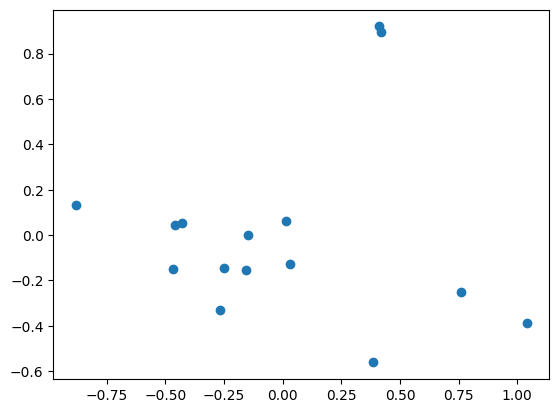

In [63]:
pca_2d = pca.transform(corr_matrix)
# pca_2d = pca.transform(corr_data)
import matplotlib.pyplot as plt
plt.scatter(pca_2d[:,0],pca_2d[:,1])

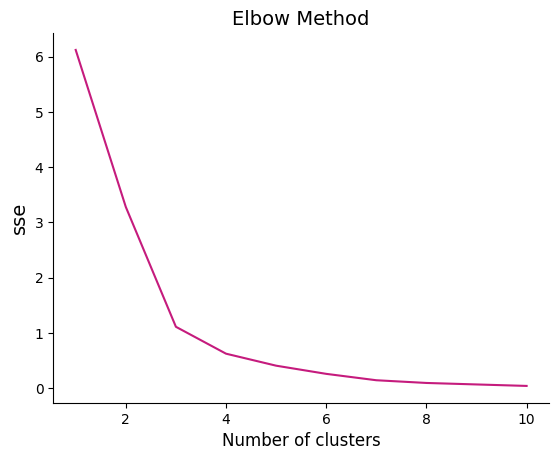

In [64]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_2d)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('sse', size=14)
plt.show()

### tạm dừng phần trên đến corr_matrix